In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
df = pd.read_excel("households_1.xlsx")

In [26]:
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
df.head()

,sex,mstatus,child,age,birth,sp,own,veh,sloc,dwellrate,nbhdrate,medinc,nsqft,nbaths,nbeds,nrooms,stories,lotsize,condo,garage,sewer,yrbuilt,estimate,purchyr,mtgd,mtgds,heloc,helump,hiedinch,white,black,american_indian,asian,hawaiian
0,1,4,1,48.0,57.0,2.0,2.0,2,3,7,7,61007,1172.0,2,2,4,2,0,1,2,1,1985,55000.0,1988,3.0,4.0,2,2,0,1,0,0,0,0
1,2,1,1,45.0,57.0,2.0,1.0,2,2,8,10,61310,2400.0,2,3,6,3,88000,2,1,2,1970,135000.0,1997,0.0,8.0,2,2,0,1,0,0,0,0
2,1,1,2,49.0,57.0,1.0,1.0,3,3,10,10,60090,3521.0,4,4,9,1,43000,2,1,1,2003,850000.0,2003,5.0,7.0,2,2,1,1,0,0,0,0
3,1,4,0,70.0,57.0,2.0,1.0,0,3,8,8,55919,1700.0,1,3,6,1,17600,2,2,1,1960,130000.0,2013,NaN,2.0,2,2,0,1,0,0,0,0
4,2,6,0,24.0,57.0,2.0,2.0,2,2,10,8,65041,1600.0,2,3,6,2,10000,2,1,1,1975,180000.0,2013,6.0,2.0,2,2,0,1,0,0,0,0


In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(', '').str.replace(')', '')

In [5]:
df.head()

,sex,mstatus,child,age,birth,race,sp,own,veh,sloc,dwellrate,nbhdrate,vloinc,loinc,medinc,nsqft,nbaths,nbeds,nrooms,stories,lotsize,condo,garage,sewer,yrbuilt,estimate,purchyr,mtgd,mtgds,heloc,helump,hiedinch
0,1,4,1,48.0,57.0,1,2.0,2,2,3,7,7,24635,39433,61007,1172.0,2,2,4,2,0,1,2,1,1985,55000.0,1988,3,4,2,2,0
1,2,1,1,45.0,57.0,1,2.0,1,2,2,8,10,27787,44432,61310,2400.0,2,3,6,3,88000,2,1,2,1970,135000.0,1997,0,8,2,2,0
2,1,1,2,49.0,57.0,1,1.0,1,3,3,10,10,30983,49575,60090,3521.0,4,4,9,1,43000,2,1,1,2003,850000.0,2003,5,7,2,2,1
3,1,4,0,70.0,57.0,1,2.0,1,0,3,8,8,20074,32090,55919,1700.0,1,3,6,1,17600,2,2,1,1960,130000.0,2013,D,2,2,2,0
4,2,6,0,24.0,57.0,1,2.0,2,2,2,10,8,25918,41455,65041,1600.0,2,3,6,2,10000,2,1,1,1975,180000.0,2013,6,2,2,2,0


Age: column has entries that are year of birth instead of age
Solution: if age > 200, age = currYear - age

Race: can't see trends with specific races easily
Solution: one hot encoding - 21 will be a 1 for each race

Own: has data that is R or D
Solution:should either make NaN or figure something else out

MTGd, MTGds: have values of B or D
Solution: Make NaN

In [6]:
for i, column in enumerate(df.columns):
    print(f"{column} {df[column].unique()}")

sex [1 2]
mstatus [4 1 6 3 5 2]
child [1 2 0 3 7 4 5 6 9 8]
age [  48.   45.   49.   70.   24.   76.   40.   71.   63.   35.   62.   60.
   72.   51.   56.   39.   50.   43.   68.   38.   64.   61.   75.   87.
   85.   93.   54.   57.   46.   59.   58.   79.   30.   55.   67.   77.
   65.   nan   66.   84.   44.   53.   41.   36.   32.   33.   28.   81.
   74.   52.   29.   42.   80.   82.   89.   69.   73.   83.   22.   86.
   31.   37.   47.   78.   88.   34.   27.   26.   25.   18. 1935.   21.
   14.   20. 1966.   15. 1972. 1944. 1977.   23.   19. 1965. 1980. 1941.
 1948.]
birth [ 57. 207. 210. 650. 610. 611. 238. 383. 652. 315. 128. 120. 380. 342.
 229. 337. 117. 660. 202. 231. 110. 242. 312. 343. 379. 195.  nan  72.
 301. 206. 377. 215. 440. 641. 375.  96. 640. 192. 653. 209. 339. 651.
 385. 654. 185. 212. 239. 313. 661. 555. 222. 109. 119. 147. 218. 213.
 316. 670. 620. 314. 351. 214. 221.]
race [ 1  4  2  3  8  6 14  5  7 21 10 15 12 11 13]
sp [ 2.  1. nan]
own [2 1 'R' 'D']
veh

Below we shall fix age data

In [7]:
df.age = df.age.apply(lambda age: 2019-age if age > 200 else age)

In [8]:
df.age.unique()

array([48., 45., 49., 70., 24., 76., 40., 71., 63., 35., 62., 60., 72.,
       51., 56., 39., 50., 43., 68., 38., 64., 61., 75., 87., 85., 93.,
       54., 57., 46., 59., 58., 79., 30., 55., 67., 77., 65., nan, 66.,
       84., 44., 53., 41., 36., 32., 33., 28., 81., 74., 52., 29., 42.,
       80., 82., 89., 69., 73., 83., 22., 86., 31., 37., 47., 78., 88.,
       34., 27., 26., 25., 18., 21., 14., 20., 15., 23., 19.])

Below we shall fix race data:
    Notes - 17 and 19 are the same
    for 21, we shall assume all five races, especially considering how much of an edge case this is

In [9]:
df['white'] = df.race.apply(lambda race: 1 if race in [1,6,7,8,9,15,16,17,18,19,21] else 0)
df['black'] = df.race.apply(lambda race: 1 if race in [2,6,10,11,12,15,16,21] else 0)
df['american_indian'] = df.race.apply(lambda race: 1 if race in [3,7,10,13,15,17,19,21] else 0)
df['asian'] = df.race.apply(lambda race: 1 if race in [4,8,11,13,14,16,17,18,19,21] else 0)
df['hawaiian'] = df.race.apply(lambda race: 1 if race in [5,9,12,14,18,21] else 0)

In [10]:
df.drop('race', axis=1, inplace=True)

Fix Own and Mortgage Data that contains letter

In [11]:
df.own = df.own.apply(lambda o: np.nan if o in ['R','D'] else o)
df.mtgd = df.mtgd.apply(lambda o: np.nan if o in ['B','D'] else o)
df.mtgds = df.mtgds.apply(lambda o: np.nan if o in ['B','D','R'] else o)

Next, we want to check for multicollinearity

In [12]:
df.corr().style.background_gradient(cmap='seismic')

Very high correlation between Very Low Income and Low Income
Solution: Eliminate one of the two

In [13]:
df[['vloinc','loinc','medinc']]

,vloinc,loinc,medinc
0,24635,39433,61007
1,27787,44432,61310
2,30983,49575,60090
3,20074,32090,55919
4,25918,41455,65041
...,...,...,...
9995,30691,49103,61242
9996,25400,40600,63400
9997,24064,38499,57608
9998,22700,36292,64811


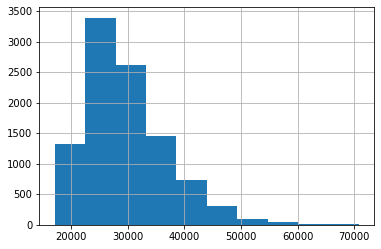

In [14]:
df.vloinc.hist()

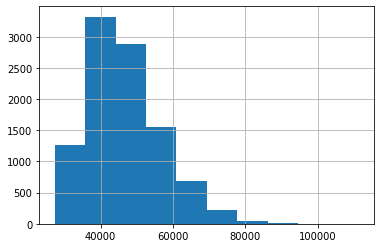

In [15]:
df.loinc.hist()

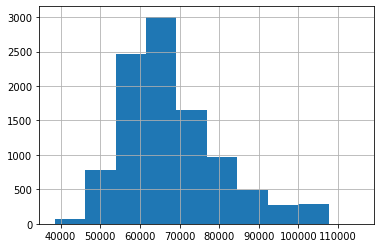

In [16]:
df.medinc.hist()

According to HUD, very-low inc is defined as 50% of median family inc and low-inc is defined as 80% of family inc. Once these numbers are obtained, further adjustments are made depending on multiple different factors

In [17]:
df['vloinc_adj'] = df.vloinc.apply(lambda i: i/.5)
df['loinc_adj'] = df.loinc.apply(lambda i: i/.8)

In [18]:
df[['vloinc','vloinc_adj']]

,vloinc,vloinc_adj
0,24635,49270.0
1,27787,55574.0
2,30983,61966.0
3,20074,40148.0
4,25918,51836.0
...,...,...
9995,30691,61382.0
9996,25400,50800.0
9997,24064,48128.0
9998,22700,45400.0


In [19]:
df[['loinc','loinc_adj']]

,loinc,loinc_adj
0,39433,49291.25
1,44432,55540.00
2,49575,61968.75
3,32090,40112.50
4,41455,51818.75
...,...,...
9995,49103,61378.75
9996,40600,50750.00
9997,38499,48123.75
9998,36292,45365.00


In [20]:
df[['vloinc_adj','loinc_adj','medinc']].corr().style.background_gradient(cmap='seismic')

,vloinc_adj,loinc_adj,medinc
vloinc_adj,1,0.978581,0.721453
loinc_adj,0.978581,1,0.624976
medinc,0.721453,0.624976,1


Here we notice a very high correlation between all three of these factors, possibly indicating we should remove two of them.
I believe we should remove the factors other than median income, since the others are derived from income

In [21]:
df.drop('vloinc', axis=1, inplace=True)
df.drop('vloinc_adj', axis=1, inplace=True)
df.drop('loinc', axis=1, inplace=True)
df.drop('loinc_adj', axis=1, inplace=True)

In [22]:
df.corr().style.background_gradient(cmap='seismic')

Now we can notice moderate correlation between number of beds, baths, and rooms
also moderate correlation between age and purchase year
also between white and black, however we should not do anything with this 

In [23]:
for i, column in enumerate(df.columns):
    print(f"{column} {df[column].unique()}")

sex [1 2]
mstatus [4 1 6 3 5 2]
child [1 2 0 3 7 4 5 6 9 8]
age [48. 45. 49. 70. 24. 76. 40. 71. 63. 35. 62. 60. 72. 51. 56. 39. 50. 43.
 68. 38. 64. 61. 75. 87. 85. 93. 54. 57. 46. 59. 58. 79. 30. 55. 67. 77.
 65. nan 66. 84. 44. 53. 41. 36. 32. 33. 28. 81. 74. 52. 29. 42. 80. 82.
 89. 69. 73. 83. 22. 86. 31. 37. 47. 78. 88. 34. 27. 26. 25. 18. 21. 14.
 20. 15. 23. 19.]
birth [ 57. 207. 210. 650. 610. 611. 238. 383. 652. 315. 128. 120. 380. 342.
 229. 337. 117. 660. 202. 231. 110. 242. 312. 343. 379. 195.  nan  72.
 301. 206. 377. 215. 440. 641. 375.  96. 640. 192. 653. 209. 339. 651.
 385. 654. 185. 212. 239. 313. 661. 555. 222. 109. 119. 147. 218. 213.
 316. 670. 620. 314. 351. 214. 221.]
sp [ 2.  1. nan]
own [ 2.  1. nan]
veh [2 3 0 1 5 4]
sloc [3 2 1 4]
dwellrate [ 7  8 10  9  6  5  4  3  1  2]
nbhdrate [ 7 10  8  9  6  5  0  4  1  3  2]
medinc [ 61007  61310  60090  55919  65041  63000  62900  65800  62206  62241
  69775  61339  72700  59577  74007  73801  63433  75329  58770  64

Further problems:
Age for head of household has values under 18
Lot Size can be zero

There are two cases where age of household head is under 18, will replace with nan

In [24]:
df['age'] = df.age.apply(lambda i: np.nan if i < 18 else i)

In [37]:
df[(df.lotsize == 0) & (df.condo ==2)]

,sex,mstatus,child,age,birth,sp,own,veh,sloc,dwellrate,nbhdrate,medinc,nsqft,nbaths,nbeds,nrooms,stories,lotsize,condo,garage,sewer,yrbuilt,estimate,purchyr,mtgd,mtgds,heloc,helump,hiedinch,white,black,american_indian,asian,hawaiian
21,1,1,0,71.0,650.0,2.0,1.0,2,1,9,9,86344,2000.0,1,2,4,1,0,2,1,2,1919,140000.0,1991,8.0,1.0,2,2,0,1,0,0,0,0
62,2,3,0,93.0,57.0,2.0,1.0,0,1,10,10,95373,800.0,1,1,3,7,0,2,2,1,1995,200000.0,2001,8.0,1.0,2,2,0,1,0,0,0,0
202,1,1,2,48.0,57.0,2.0,2.0,2,1,6,6,76309,1250.0,1,3,6,3,0,2,1,1,1970,90000.0,1996,6.0,2.0,2,2,1,0,1,0,0,0
255,1,1,0,NaN,343.0,2.0,2.0,2,1,8,8,64635,1900.0,1,3,6,2,0,2,1,1,1950,320000.0,1983,3.0,2.0,2,2,0,0,1,0,0,0
435,1,1,0,64.0,57.0,2.0,2.0,2,1,10,8,95373,900.0,2,2,6,3,0,2,1,1,1920,175000.0,1991,5.0,2.0,2,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9574,1,5,0,61.0,128.0,2.0,2.0,1,1,7,7,86344,800.0,1,2,4,2,0,2,1,1,1960,1000.0,1977,2.0,2.0,2,2,0,1,0,0,0,0
9591,2,4,0,61.0,57.0,2.0,1.0,0,2,9,10,71200,1800.0,2,3,7,3,0,2,1,1,1960,160000.0,2007,8.0,5.0,2,2,0,1,0,0,0,0
9664,2,1,0,78.0,57.0,2.0,2.0,0,1,8,7,85500,850.0,1,2,5,3,0,2,1,1,1920,85000.0,1964,4.0,2.0,2,2,0,0,1,0,0,0
9868,1,6,0,37.0,57.0,2.0,2.0,3,1,9,9,79200,1000.0,1,1,5,4,0,2,1,1,1950,50000.0,2010,2.0,2.0,2,2,0,1,0,0,0,0


In [25]:
categories = ['mstatus', 'sp', 'own', 'sloc', 'condo', 'garage', 'sewer', 'heloc', 'helump', 'white','black','american_indian', 'asian', 'hawaiian', 'hiedinch']
for c in categories:
    df[c] = df[c].astype('category')

In [27]:
df.dtypes

sex                   int64
mstatus            category
child                 int64
age                 float64
birth               float64
sp                 category
own                category
veh                   int64
sloc               category
dwellrate             int64
nbhdrate              int64
medinc                int64
nsqft               float64
nbaths                int64
nbeds                 int64
nrooms                int64
stories               int64
lotsize               int64
condo              category
garage             category
sewer              category
yrbuilt               int64
estimate            float64
purchyr               int64
mtgd                float64
mtgds               float64
heloc              category
helump             category
hiedinch           category
white              category
black              category
american_indian    category
asian              category
hawaiian           category
dtype: object

In [42]:
df.drop(categories, axis=1).corr().style.background_gradient(cmap='seismic').set_precision(2).highlight_max(axis=1)

,sex,child,age,birth,veh,dwellrate,nbhdrate,medinc,nsqft,nbaths,nbeds,nrooms,stories,lotsize,yrbuilt,estimate,purchyr,mtgd,mtgds
sex,1,-0.06,0.064,-0.05,-0.087,0.021,0.027,0.0036,0.0024,-0.049,-0.064,-0.077,0.0075,-0.037,-0.049,-0.04,-0.046,-0.0011,0.021
child,-0.06,1,-0.42,0.13,0.24,-0.084,-0.06,0.051,0.06,0.16,0.31,0.25,0.022,-0.017,0.089,0.059,0.25,-0.12,0.019
age,0.064,-0.42,1,-0.063,-0.14,0.14,0.13,-0.015,0.013,-0.057,-0.12,-0.058,-0.02,0.044,-0.14,0.022,-0.62,0.26,-0.11
birth,-0.05,0.13,-0.063,1,0.048,-0.018,-0.014,0.083,0.00084,0.039,0.063,0.022,0.02,-0.072,0.0039,0.058,0.099,-0.011,-0.022
veh,-0.087,0.24,-0.14,0.048,1,0.013,-0.013,0.13,0.089,0.21,0.24,0.27,0.027,-0.0051,0.086,0.16,0.079,-0.0027,-0.083
dwellrate,0.021,-0.084,0.14,-0.018,0.013,1,0.56,-0.024,0.07,0.16,0.067,0.11,0.0086,0.077,0.13,0.13,-0.041,0.095,-0.069
nbhdrate,0.027,-0.06,0.13,-0.014,-0.013,0.56,1,-0.021,0.056,0.11,0.044,0.064,0.025,0.082,0.088,0.1,-0.025,0.083,-0.047
medinc,0.0036,0.051,-0.015,0.083,0.13,-0.024,-0.021,1,0.024,8.3e-06,0.068,0.11,0.21,-0.13,-0.15,0.31,-0.024,0.079,-0.13
nsqft,0.0024,0.06,0.013,0.00084,0.089,0.07,0.056,0.024,1,0.24,0.22,0.26,0.041,0.052,0.085,0.18,0.0074,0.056,-0.053
nbaths,-0.049,0.16,-0.057,0.039,0.21,0.16,0.11,8.3e-06,0.24,1,0.49,0.54,0.031,0.031,0.4,0.39,0.18,0.11,-0.14


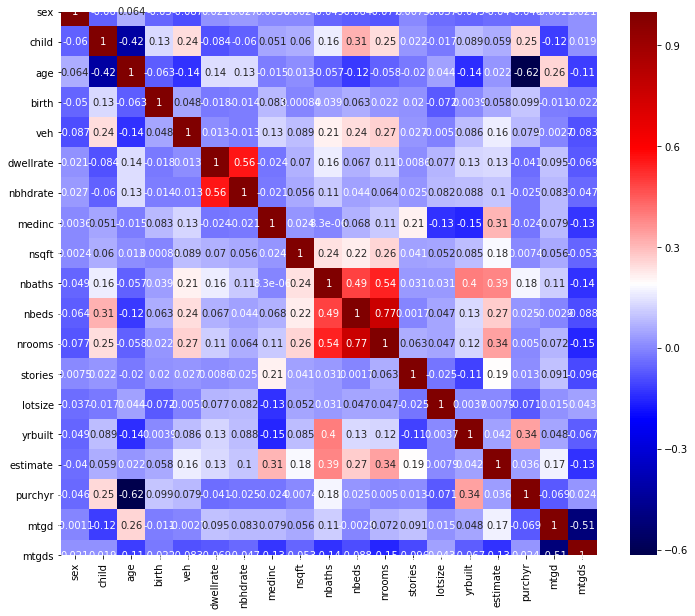

In [53]:
%matplotlib inline
plt.figure(figsize=(12,10))
plt.tight_layout()
sns.heatmap(df.drop(categories, axis=1).corr(),annot=True, cmap='seismic')
plt.show()

In [64]:
def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


In [65]:
def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )


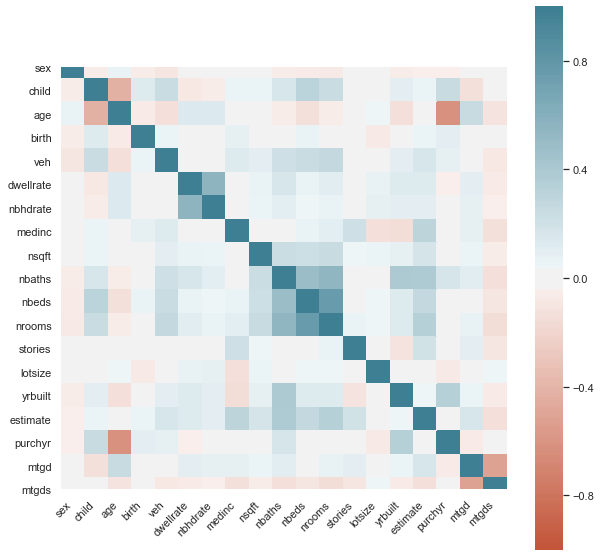

In [66]:
corr = df.drop(categories, axis=1).corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

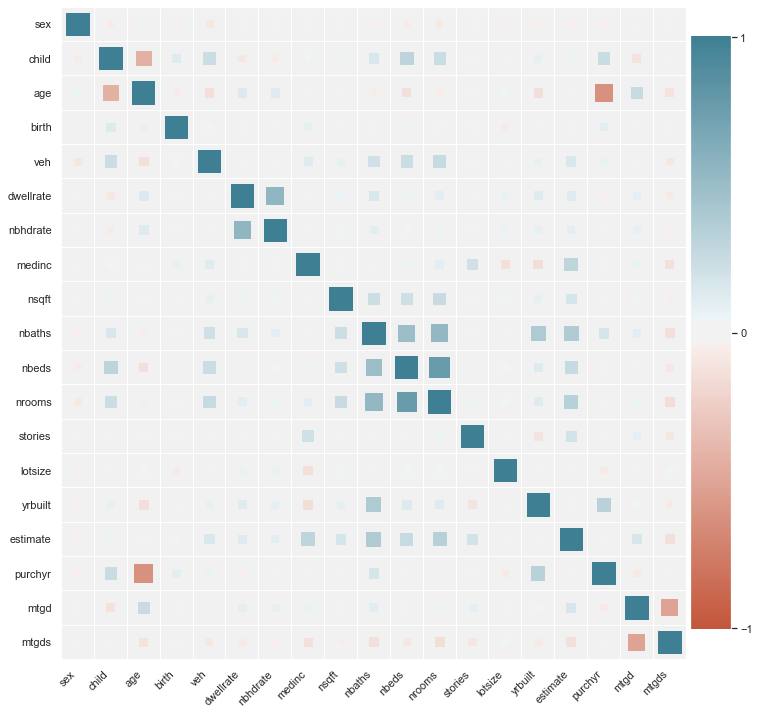

In [69]:
plt.figure(figsize=(12, 12))
corrplot(corr)